<a href="https://colab.research.google.com/github/alifele/Machine_learning/blob/master/Assignments/fifth%20Assing./Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Reduction Using Neural Networks
I am going to use the neural network for feature reduction. As you can see in the picture I will decrease the number of neurons in the middle layer and then increse it to the 10 neurons(Since we have 10 classes). The neural network with thinest neck and highest accuracy in classifing data will be the best feature reductor.


![alt text](https://raw.githubusercontent.com/alifele/Machine_learning/master/Assignments/fifth%20Assing./Untitled.png)

#Important Imports

In [0]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests, io
from sklearn.preprocessing import scale
import requests
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         #

#Loading Data

In [0]:
url = 'https://github.com/alifele/Machine_learning/raw/master/Assignments/fourth%20Assing./X.npz'
s=requests.get(url, stream=True).content
data_X=np.load(io.BytesIO(s) )
url = 'https://github.com/alifele/Machine_learning/raw/master/Assignments/fourth%20Assing./Y.npz'
s=requests.get(url, stream=True).content
data_Y = np.load(io.BytesIO(s))

the shape of X is (102352, 1024): 
the shape of Y is (102352,): 


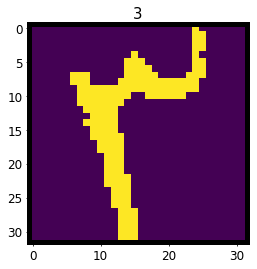

In [3]:
X = data_X['arr_0'].reshape(-1,32*32)
# X = scale(X)    scaling data destroyes them. TRY it!!!
X_pic = X.reshape(-1,32,32)
Y = data_Y['arr_0']

plt.imshow(X_pic[12])
plt.title(Y[12])
print('the shape of X is {}: '.format(X.shape))
print('the shape of Y is {}: '.format(Y.shape))

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X_pic,Y)

#Calculating the weights of classes

In [0]:
from sklearn.utils import class_weight
weight = class_weight.compute_class_weight('balanced',
                                          np.unique(y_train),
                                          y_train)


#Designing Network

#First model with 20 neurons in neck

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(32,32)))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(20, activation='relu'))   # Neck
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                660       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                672       
_________________________________________________________________
dens

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=320,
         validation_split=0.1,class_weight=weight)

Train on 69087 samples, validate on 7677 samples
Epoch 1/10
69087/69087 [==============================] - 7s 94us/sample - loss: 0.3283 - acc: 0.8965 - val_loss: 0.0985 - val_acc: 0.9706
Epoch 2/10
69087/69087 [==============================] - 6s 86us/sample - loss: 0.0698 - acc: 0.9793 - val_loss: 0.0881 - val_acc: 0.9719
Epoch 3/10
69087/69087 [==============================] - 6s 86us/sample - loss: 0.0436 - acc: 0.9868 - val_loss: 0.0558 - val_acc: 0.9824
Epoch 4/10
69087/69087 [==============================] - 6s 86us/sample - loss: 0.0285 - acc: 0.9914 - val_loss: 0.0557 - val_acc: 0.9838
Epoch 5/10
69087/69087 [==============================] - 6s 86us/sample - loss: 0.0215 - acc: 0.9931 - val_loss: 0.0543 - val_acc: 0.9850
Epoch 6/10
69087/69087 [==============================] - 6s 85us/sample - loss: 0.0143 - acc: 0.9956 - val_loss: 0.0518 - val_acc: 0.9865
Epoch 7/10
69087/69087 [==============================] - 6s 85us/sample - loss: 0.0130 - acc: 0.9958 - val_loss: 0.0

(0, 1)

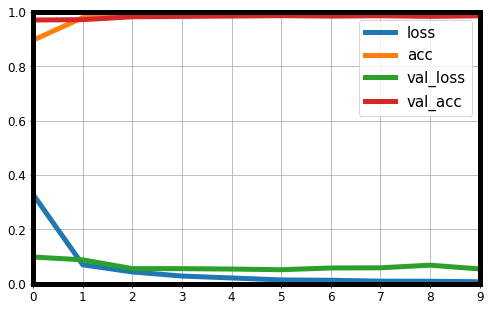

In [9]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

#Accuracy of 20 Neurons is :  0.9882

In [10]:
model.evaluate(X_test,y_test)

25588/25588 [==============================] - 2s 68us/sample - loss: 0.0522 - acc: 0.9874


[0.05216265416427971, 0.98741597]

#second model with 15 neurons in neck

In [11]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=(32,32)))
model2.add(keras.layers.Dense(512, activation='relu'))
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dense(32, activation='relu'))
model2.add(keras.layers.Dense(15, activation='relu'))   # Neck
model2.add(keras.layers.Dense(32, activation='relu'))
model2.add(keras.layers.Dense(25, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_10 (Dense)             (None, 15)                495       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_12 (Dense)             (None, 25)                825       
__________

Train on 69087 samples, validate on 7677 samples
Epoch 1/10
69087/69087 [==============================] - 6s 91us/sample - loss: 0.4220 - acc: 0.8688 - val_loss: 0.1263 - val_acc: 0.9633
Epoch 2/10
69087/69087 [==============================] - 6s 86us/sample - loss: 0.0811 - acc: 0.9771 - val_loss: 0.0814 - val_acc: 0.9762
Epoch 3/10
69087/69087 [==============================] - 6s 87us/sample - loss: 0.0499 - acc: 0.9854 - val_loss: 0.0605 - val_acc: 0.9807
Epoch 4/10
69087/69087 [==============================] - 6s 88us/sample - loss: 0.0329 - acc: 0.9902 - val_loss: 0.0614 - val_acc: 0.9810
Epoch 5/10
69087/69087 [==============================] - 6s 87us/sample - loss: 0.0237 - acc: 0.9929 - val_loss: 0.0559 - val_acc: 0.9857
Epoch 6/10
69087/69087 [==============================] - 6s 87us/sample - loss: 0.0197 - acc: 0.9940 - val_loss: 0.0517 - val_acc: 0.9866
Epoch 7/10
69087/69087 [==============================] - 6s 87us/sample - loss: 0.0137 - acc: 0.9958 - val_loss: 0.0

(0, 1)

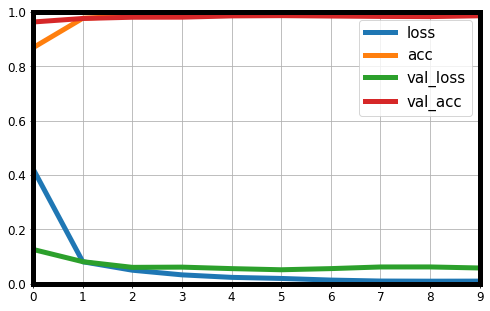

In [12]:
model2.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


history2 = model2.fit(X_train, y_train, epochs=10, batch_size=320,
         validation_split=0.1,class_weight=weight)

pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

##Accuracy of 15vNeurons is :  0.9878

In [13]:
model2.evaluate(X_test,y_test)

25588/25588 [==============================] - 2s 68us/sample - loss: 0.0579 - acc: 0.9865


[0.05788241135746642, 0.98651713]

#third model with 13 neurons in neck

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_17 (Dense)             (None, 13)                429       
_________________________________________________________________
dense_18 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_19 (Dense)             (None, 25)                825       
__________

(0, 1)

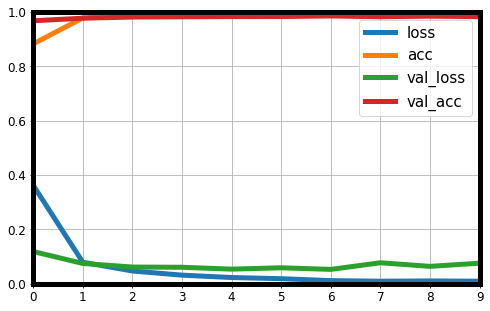

In [14]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape=(32,32)))
model3.add(keras.layers.Dense(512, activation='relu'))
model3.add(keras.layers.Dense(128, activation='relu'))
model3.add(keras.layers.Dense(32, activation='relu'))
model3.add(keras.layers.Dense(13, activation='relu'))   # Neck
model3.add(keras.layers.Dense(32, activation='relu'))
model3.add(keras.layers.Dense(25, activation='relu'))
model3.add(keras.layers.Dense(10, activation='softmax'))
model3.summary()


model3.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


history3 = model3.fit(X_train, y_train, epochs=10, batch_size=320,
         validation_split=0.1,class_weight=weight)

pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

#Accuracy of 13 Neurons is :  0.9860

In [15]:
model3.evaluate(X_test,y_test)

25588/25588 [==============================] - 2s 71us/sample - loss: 0.0674 - acc: 0.9845


[0.06741616077680054, 0.984524]

#fourth model with 10 neurons in neck

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_23 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                330       
_________________________________________________________________
dense_25 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_26 (Dense)             (None, 25)                825       
__________

(0, 1)

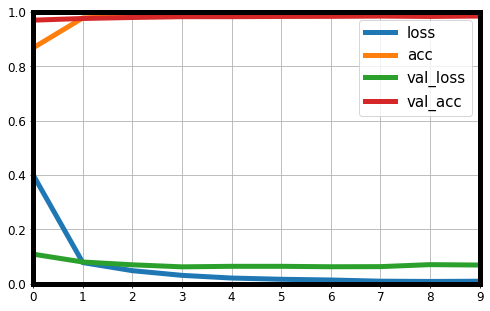

In [16]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Flatten(input_shape=(32,32)))
model4.add(keras.layers.Dense(512, activation='relu'))
model4.add(keras.layers.Dense(128, activation='relu'))
model4.add(keras.layers.Dense(32, activation='relu'))
model4.add(keras.layers.Dense(10, activation='relu'))   # Neck
model4.add(keras.layers.Dense(32, activation='relu'))
model4.add(keras.layers.Dense(25, activation='relu'))
model4.add(keras.layers.Dense(10, activation='softmax'))
model4.summary()


model4.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


history4 = model4.fit(X_train, y_train, epochs=10, batch_size=320,
         validation_split=0.1,class_weight=weight)

pd.DataFrame(history4.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

#Accuracy of 10 Neurons is :  0.9873

In [17]:
model4.evaluate(X_test,y_test)

25588/25588 [==============================] - 2s 77us/sample - loss: 0.0597 - acc: 0.9851


[0.05973764776124148, 0.9851102]

#fifth model with 8 neurons in neck

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_36 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_37 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_39 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_40 (Dense)             (None, 25)                825       
__________

(0, 1)

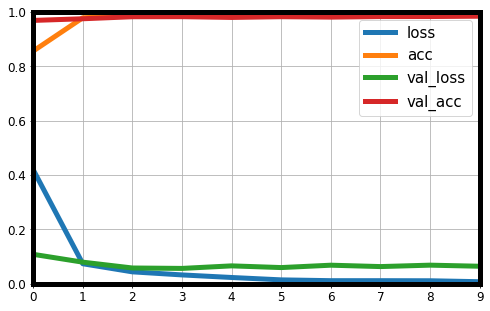

In [20]:
model5 = keras.models.Sequential()
model5.add(keras.layers.Flatten(input_shape=(32,32)))
model5.add(keras.layers.Dense(512, activation='relu'))
model5.add(keras.layers.Dense(128, activation='relu'))
model5.add(keras.layers.Dense(32, activation='relu'))
model5.add(keras.layers.Dense(8, activation='relu'))   # Neck
model5.add(keras.layers.Dense(32, activation='relu'))
model5.add(keras.layers.Dense(25, activation='relu'))
model5.add(keras.layers.Dense(10, activation='softmax'))
model5.summary()


model5.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


history5 = model5.fit(X_train, y_train, epochs=10, batch_size=320,
         validation_split=0.1,class_weight=weight)

pd.DataFrame(history5.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

#Accuracy of 8 Neurons is :  0.9868

In [21]:
model5.evaluate(X_test,y_test)

25588/25588 [==============================] - 2s 75us/sample - loss: 0.0593 - acc: 0.9868


[0.059322096882605056, 0.98679066]

#sixth model with 6 neurons in neck

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_43 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_44 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_45 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_46 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_47 (Dense)             (None, 25)                825       
__________

(0, 1)

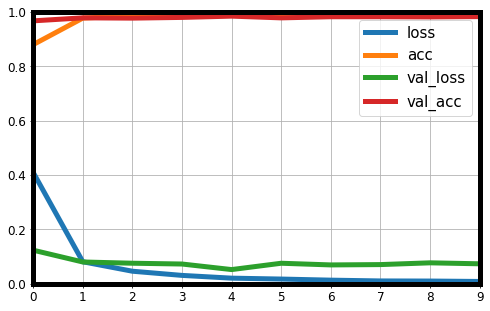

In [22]:
model6= keras.models.Sequential()
model6.add(keras.layers.Flatten(input_shape=(32,32)))
model6.add(keras.layers.Dense(512, activation='relu'))
model6.add(keras.layers.Dense(128, activation='relu'))
model6.add(keras.layers.Dense(32, activation='relu'))
model6.add(keras.layers.Dense(6, activation='relu'))   # Neck
model6.add(keras.layers.Dense(32, activation='relu'))
model6.add(keras.layers.Dense(25, activation='relu'))
model6.add(keras.layers.Dense(10, activation='softmax'))
model6.summary()


model6.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


history6 = model6.fit(X_train, y_train, epochs=10, batch_size=320,
         validation_split=0.1,class_weight=weight)

pd.DataFrame(history6.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

#Accuracy of 6 Neurons is :  0.9859

In [23]:
model6.evaluate(X_test,y_test)

25588/25588 [==============================] - 2s 74us/sample - loss: 0.0644 - acc: 0.9859


[0.06440953590004103, 0.9859309]

#seventh model with 4 neurons in neck

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_50 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_51 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_52 (Dense)             (None, 4)                 132       
_________________________________________________________________
dense_53 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_54 (Dense)             (None, 25)                825       
__________

(0, 1)

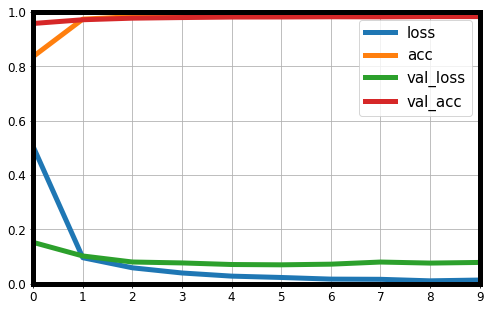

In [24]:
model7= keras.models.Sequential()
model7.add(keras.layers.Flatten(input_shape=(32,32)))
model7.add(keras.layers.Dense(512, activation='relu'))
model7.add(keras.layers.Dense(128, activation='relu'))
model7.add(keras.layers.Dense(32, activation='relu'))
model7.add(keras.layers.Dense(4, activation='relu'))   # Neck
model7.add(keras.layers.Dense(32, activation='relu'))
model7.add(keras.layers.Dense(25, activation='relu'))
model7.add(keras.layers.Dense(10, activation='softmax'))
model7.summary()


model7.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


history7 = model7.fit(X_train, y_train, epochs=10, batch_size=320,
         validation_split=0.1,class_weight=weight)

pd.DataFrame(history7.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

#Accuracy of 4 Neurons is :  0.9855

In [25]:
model7.evaluate(X_test,y_test)

25588/25588 [==============================] - 2s 80us/sample - loss: 0.0604 - acc: 0.9855


[0.06042503493387353, 0.985501]

#eigth model with 2 neurons in neck

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_56 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_57 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_58 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_59 (Dense)             (None, 2)                 66        
_________________________________________________________________
dense_60 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_61 (Dense)             (None, 25)                825       
__________

(0, 1)

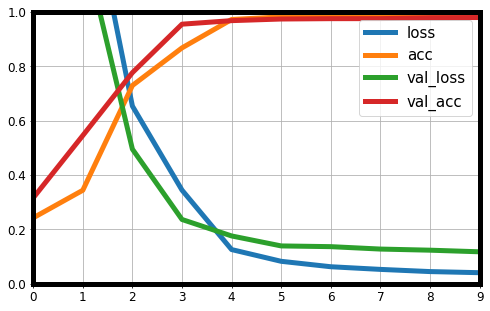

In [26]:
model8= keras.models.Sequential()
model8.add(keras.layers.Flatten(input_shape=(32,32)))
model8.add(keras.layers.Dense(512, activation='relu'))
model8.add(keras.layers.Dense(128, activation='relu'))
model8.add(keras.layers.Dense(32, activation='relu'))
model8.add(keras.layers.Dense(2, activation='relu'))   # Neck
model8.add(keras.layers.Dense(32, activation='relu'))
model8.add(keras.layers.Dense(25, activation='relu'))
model8.add(keras.layers.Dense(10, activation='softmax'))
model8.summary()


model8.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


history8 = model8.fit(X_train, y_train, epochs=10, batch_size=320,
         validation_split=0.1,class_weight=weight)

pd.DataFrame(history8.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

#Accuracy of 2 Neurons is :  0.9819

In [27]:
model8.evaluate(X_test,y_test)

25588/25588 [==============================] - 2s 82us/sample - loss: 0.0974 - acc: 0.9819


[0.097423863153937, 0.9819447]

#ninth model with 1 neurons in neck

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_63 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_64 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_65 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 33        
_________________________________________________________________
dense_67 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_68 (Dense)             (None, 25)                825       
__________

(0, 1)

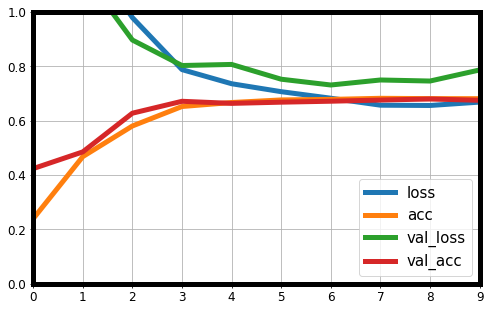

In [28]:
model9= keras.models.Sequential()
model9.add(keras.layers.Flatten(input_shape=(32,32)))
model9.add(keras.layers.Dense(512, activation='relu'))
model9.add(keras.layers.Dense(128, activation='relu'))
model9.add(keras.layers.Dense(32, activation='relu'))
model9.add(keras.layers.Dense(1, activation='relu'))   # Neck
model9.add(keras.layers.Dense(32, activation='relu'))
model9.add(keras.layers.Dense(25, activation='relu'))
model9.add(keras.layers.Dense(10, activation='softmax'))
model9.summary()


model9.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


history9 = model9.fit(X_train, y_train, epochs=10, batch_size=320,
         validation_split=0.1,class_weight=weight)

pd.DataFrame(history9.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

#Accuracy of 1 Neuron is :  0.9819

In [29]:
model8.evaluate(X_test,y_test)

25588/25588 [==============================] - 2s 80us/sample - loss: 0.0974 - acc: 0.9819


[0.097423863153937, 0.9819447]

#Summary 

|#||model||Neck Neurons||accuracy|
|----||---------||-----------------------||---------------|
|1  || model1  ||        20     ||         0.9882       |
| 2 || model2  ||        15     ||   0.9878    |
| 3 || model3  ||        13     ||      0.9860      |
| 4 || model4  ||        10     ||      0.9873       |
| 5 || model5  ||          8     ||      0.9868    |
| 6 || model6  ||          6     ||      0.9859   |
| 7 || model7  ||          4     ||      0.9855   |
|8 || model8  ||          2     ||      0.9819   |
|9 || model9 ||          1     ||      0.9819   |